Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [159]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


## Data cleaning and exploration!

#### Cleaning data

In [160]:
# Checking missing values and remove them
insurance.isna().sum()
insurance.info()
insurance.dropna(inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [161]:
# Standardize categories in region 
insurance['region'] = insurance['region'].str.lower()

# Standardize sex column
insurance['sex'].unique()
MALE = 'male'
FEMALE = 'female'
sex_map = {'F': FEMALE,'woman': FEMALE, 'man': MALE, 'M': MALE} 

insurance['sex'] = insurance['sex'].replace(sex_map)

#Change smoker column to boolean
insurance['smoker'] = (insurance['smoker'] == 'yes')

# Standardize data type (float)
insurance['charges'] = insurance['charges'].str.strip('$').astype('float64')
insurance['age'] = insurance['age'].astype('int')
insurance['children'] = insurance['children'].abs()
insurance['age'] = insurance['age'].abs()

In [162]:
# Convert to 0 and 1 instead of False or True 
insurance['smoker'] = insurance['smoker'].astype('int64')
# Male to 1 and Female to 0
insurance['is_male']= (insurance['sex'] == 'male').astype('int64')
insurance = insurance.drop(columns = 'sex')

# Rearrange 'is_male' next to age
column_to_move = insurance.pop("is_male")

# insert column with insert(location, column_name, column_value)

insurance.insert(1, "is_male", column_to_move)

In [163]:
insurance.sample(10)


,age,is_male,bmi,children,smoker,region,charges
267,59,0,32.395,3.0,0,northeast,14590.63205
668,62,1,32.015,0.0,1,northeast,45710.20785
12,23,1,34.400,0.0,0,southwest,1826.84300
1045,43,0,24.700,2.0,1,northwest,21880.82000
817,23,1,37.100,3.0,0,southwest,3597.59600
767,42,0,29.000,1.0,0,southwest,7050.64200
260,58,0,25.200,0.0,0,southwest,11837.16000
1137,26,0,22.230,0.0,0,northwest,3176.28770
638,39,1,26.410,0.0,1,northeast,20149.32290
333,56,0,28.785,0.0,0,northeast,11658.37915


In [177]:
region_encoded = pd.get_dummies(insurance['region'], prefix='region', dtype='int')
insurance = insurance.drop(columns = 'region')
insurance = pd.concat([insurance,region_encoded],axis=1)




In [190]:
insurance = insurance[~insurance['charges'].isna()]

age                     0
is_male                 0
bmi                     0
children                0
smoker                  0
charges                 0
['region']_northeast    0
['region']_northwest    0
['region']_southeast    0
['region']_southwest    0
dtype: int64

In [189]:
insurance.head()

,age,is_male,bmi,children,smoker,charges,['region']_northeast,['region']_northwest,['region']_southeast,['region']_southwest
0,19,0,27.900,0.0,1,16884.92400,0,0,0,1
1,18,1,33.770,1.0,0,1725.55230,0,0,1,0
2,28,1,33.000,3.0,0,4449.46200,0,0,1,0
3,33,1,22.705,0.0,0,21984.47061,0,1,0,0
4,32,1,28.880,0.0,0,3866.85520,0,1,0,0


#### Scatterplots of relationships between variables & charges

In [126]:
import matplotlib.pyplot as plt


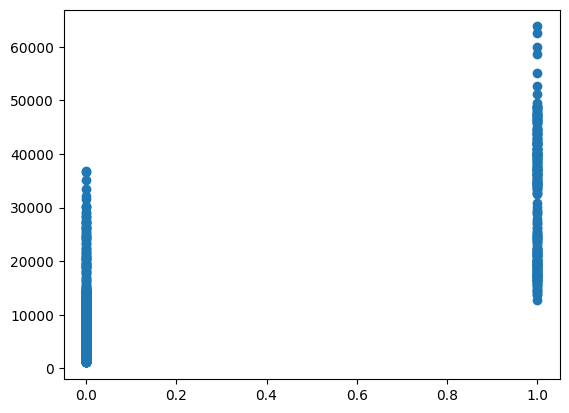

In [128]:
plt.scatter(insurance['smoker'],insurance['charges'])

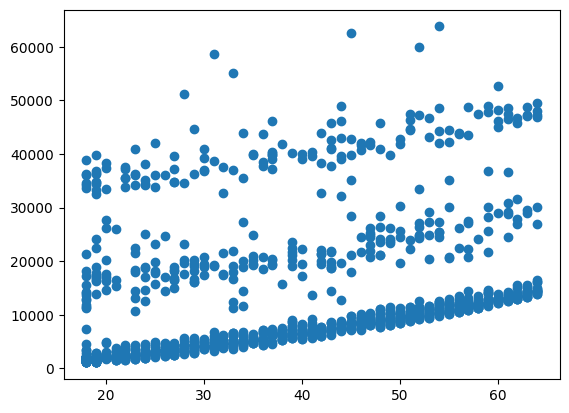

In [164]:
plt.scatter(insurance['age'],insurance['charges'])

## Fit a linear regression model to our data 

In [191]:
df = insurance.copy()
df.head()


,age,is_male,bmi,children,smoker,charges,['region']_northeast,['region']_northwest,['region']_southeast,['region']_southwest
0,19,0,27.900,0.0,1,16884.92400,0,0,0,1
1,18,1,33.770,1.0,0,1725.55230,0,0,1,0
2,28,1,33.000,3.0,0,4449.46200,0,0,1,0
3,33,1,22.705,0.0,0,21984.47061,0,1,0,0
4,32,1,28.880,0.0,0,3866.85520,0,1,0,0


#### Split the data into inputs "X" and outputs "Y" 


In [192]:
X = df.drop('charges',axis = 1)
y = df['charges']

In [193]:
X.shape, y.shape

((1207, 9), (1207,))

In [194]:
# Data train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3) #Split training/test into 70/30 

In [195]:
X_train.shape, X_test.shape

((844, 9), (363, 9))

In [196]:
y_train.shape, y_test.shape

((844,), (363,))

#### Train and evaluate a linear regression model

In [197]:
# Import linear_model from Scikit-Learn Library 
from sklearn import linear_model

# Train a linear regression model using Scikit-Learn Library
# First we instantiate an object out of our linear_model class
# Then we apply the fit() method to fit the model to the training dataset (X_train, y_trian)
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [202]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make prediction on the test set which the model has never seen before
y_pred = linear_regression_model.predict(X_test)

# Calculate the R Square Score
r2 = r2_score(y_test,y_pred)

# Display the R Square Score
r2



0.7104748699236827

## See how model performs on validation dataset 

#### Create a helper function to preprocess df 

In [229]:
val_df = pd.read_csv('validation_dataset.csv')
val_df.sample(10)

,age,sex,bmi,children,smoker,region
18,84.0,female,75.742693,2.0,yes,southwest
22,33.0,female,35.530000,0.0,yes,northwest
42,29.0,male,27.200000,0.0,no,southwest
48,61.0,male,33.915000,0.0,no,northeast
36,78.0,male,66.370173,11.0,yes,northwest
15,18.0,male,30.400000,3.0,no,northeast
44,26.0,male,32.490000,1.0,no,northeast
6,29.0,female,32.110000,2.0,no,northwest
38,18.0,male,21.780000,2.0,no,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [230]:
def preprocess_df(df):
    #Change smoker column to boolean
    df['smoker'] = (df['smoker'] == 'yes').astype('int64')

    # Male to 1 and Female to 0
    df['is_male']= (df['sex'] == 'male').astype('int64')
    df = df.drop(columns = 'sex')
    
    # Rearrange 'is_male' next to age
    column_to_move = df.pop("is_male") 
    df.insert(1, "is_male", column_to_move)
    
    # hot-encoding region
    region_encoded = pd.get_dummies(df['region'], prefix=['region'], dtype='int')
    df = df.drop(columns = 'region')
    df = pd.concat([df,region_encoded],axis=1)

    return df

In [231]:
validation_df = preprocess_df(val_df)

# Make predictions using 
predictions = linear_regression_model.predict(validation_df)

validation_data = val_df.copy()

#Store the predictions as a new column in the validation dataset 
validation_data['predicted_charges'] = predictions 



In [232]:
# Handle negative values by replacing them with the minimum basic charge of 1000$
validation_data.loc[validation_data['predicted_charges'] < 1000,'predicted_charges'] = 1000
validation_data

,age,sex,bmi,children,smoker,region,is_male,predicted_charges
0,18.0,female,24.090000,1.0,0,southeast,0,1000.000000
1,39.0,male,26.410000,0.0,1,northeast,1,30467.048008
2,27.0,male,29.150000,0.0,1,southeast,1,27911.942072
3,71.0,male,65.502135,13.0,1,southeast,1,57131.661066
4,28.0,male,38.060000,0.0,0,southeast,1,6863.875638
5,70.0,female,72.958351,11.0,1,southeast,0,58733.373618
6,29.0,female,32.110000,2.0,0,northwest,0,6835.977030
7,42.0,female,41.325000,1.0,0,northeast,0,12730.939036
8,48.0,female,36.575000,0.0,0,northwest,0,12307.292126
9,63.0,male,33.660000,3.0,0,southeast,1,15987.317974


In [ ]:
# Implement model creation and training here
# Use as many cells as you need
